# ENTREGABLE 5

# INSTRUCCIONES

Entrenar un perceptrón para que sea capaz de simular el comportamiento de una puerta AND.

- Generar 5000 muestras aleatorias de entrenamiento, 500 de validación y 500 de test.


*Pistas*

 * w es un vector que corresponde al valor de los pesos de cada neurona de entrada
 * b es un valor que corresponde al bias del modelo
 * El valor de la suma ponderada será el valor resultante de: *(pesos x entradas) + bias*. Para ello utilizar el producto escalar (*np.dot*)


In [ ]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

epoch: 0 | train error: 0.03016411439920633 | val error: 0.007718236558652598
epoch: 10 | train error: 0.00046393390982935756 | val error: 0.00045850178061689485
epoch: 20 | train error: 0.00022244250766310212 | val error: 0.0002263582398918298
epoch: 30 | train error: 0.00014509552790674464 | val error: 0.00014920451600774508
epoch: 40 | train error: 0.00010731721174430865 | val error: 0.000110966055861491
epoch: 50 | train error: 8.500929649104722e-05 | val error: 8.82026911341827e-05
epoch: 60 | train error: 7.0312261686713e-05 | val error: 7.312688900223216e-05
epoch: 70 | train error: 5.991092868531762e-05 | val error: 6.241803020950299e-05
epoch: 80 | train error: 5.2168100184740386e-05 | val error: 5.4424244882836224e-05
epoch: 90 | train error: 4.618329686072758e-05 | val error: 4.8232165440686705e-05


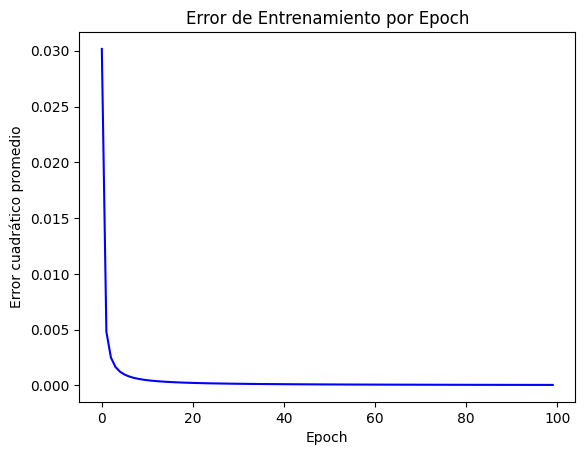

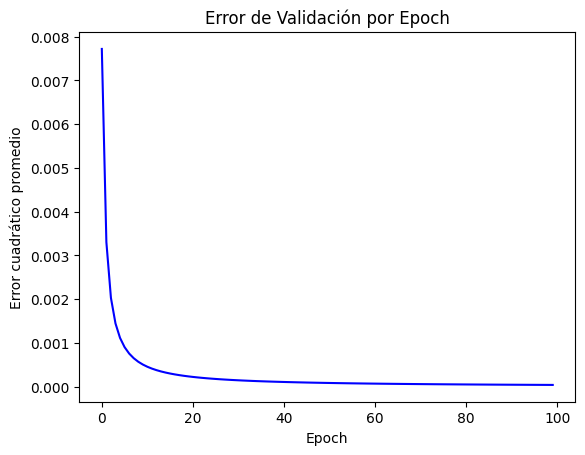

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size):
        # Inicializamos los pesos y el sesgo de manera aleatoria
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()

    def sigmoid(self, x):
        # Función de activación: sigmoide
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivada de la función sigmoide
        return x * (1 - x)

    def predict(self, inputs):
        # Calculamos la suma ponderada de las entradas
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        # Aplicamos la función de activación y devolvemos la predicción
        return self.sigmoid(weighted_sum)

    def train(self, X_train, Y_train, X_validation, Y_validation, learning_rate=0.1, epochs=100):

        train_error_by_epoch = []
        val_error_by_epoch = []

        for epoch in range(epochs):
            train_error_acum = 0
            for i in range(X_train.shape[0]):

                inputs = X_train[i]

                # Calcular la predicción del perceptrón
                prediction = self.predict(inputs)

                # Calcular el error
                error = Y_train[i] - prediction
                train_error_acum += error ** 2  # Aquí se acumula el cuadrado del error

                # Actualizar pesos y sesgo mediante el descenso del gradiente
                self.weights = self.weights + learning_rate * error * self.sigmoid_derivative(prediction) * inputs
                self.bias = self.bias + learning_rate * error

            # Calcular el error promedio por epoch
            train_error_acum /= X_train.shape[0]
            train_error_by_epoch.append(train_error_acum)

            val_error_acum = 0
            for i in range(X_validation.shape[0]):
                inputs = X_validation[i]
                prediction = self.predict(inputs)

                error = Y_validation[i] - prediction
                val_error_acum += error ** 2

            # Calcular el error promedio de validación por epoch
            val_error_acum /= X_validation.shape[0]
            val_error_by_epoch.append(val_error_acum)

            # Visualización del progreso
            if epoch % 10 == 0:
                print('epoch:', epoch, '| train error:', train_error_acum, '| val error:', val_error_acum)

        # Visualización del error de entrenamiento por epoch
        plt.figure()
        plt.plot(range(epochs), train_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Entrenamiento por Epoch')
        plt.show()

        # Visualización del error de validación por epoch
        plt.figure()
        plt.plot(range(epochs), val_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Validación por Epoch')
        plt.show()

# Generar muestras aleatorias para la puerta lógica AND
X_train = np.random.randint(2, size=(5000, 2))
Y_train = np.prod(X_train, axis=1)  # Salida de la puerta AND
X_validation = np.random.randint(2, size=(500, 2))
Y_validation = np.prod(X_validation, axis=1)  # Salida de la puerta AND
X_test = np.random.randint(2, size=(500, 2))
Y_test = np.prod(X_test, axis=1)  # Salida de la puerta AND

# Crear y entrenar el perceptrón
perceptron = Perceptron(input_size=2)
perceptron.train(X_train, Y_train, X_validation, Y_validation)


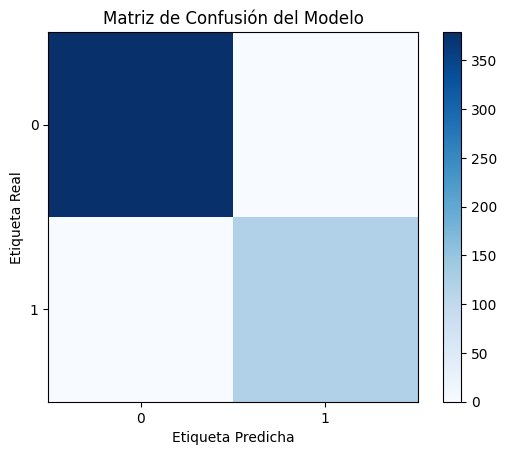

In [ ]:
# Generar las predicciones para el conjunto de datos de prueba
predictions_test = perceptron.predict(X_test)

# Convertir las predicciones a valores binarios (0 o 1) basados en un umbral de 0.5
predictions_binary = np.where(predictions_test >= 0.5, 1, 0)

# Calcular la matriz de confusión
confusion_matrix = np.zeros((2, 2))
for true_label, predicted_label in zip(Y_test, predictions_binary):
    confusion_matrix[true_label][predicted_label] += 1

# Visualizar la matriz de confusión
plt.figure()
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión del Modelo')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'])
plt.yticks(tick_marks, ['0', '1'])
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()


Como conclusión observamos:

- **TN (True Negative)**: Hay aprox. 350 muestras clasificadas correctamente como negativas (clase 0).

- **TP (True Positive)**: Hay aprox. 100 muestras clasificadas correctamente como positivas (clase 1).

- **FP (False Positive)**: No hay muestras clasificadas incorrectamente como positivas (clase 1).

- **FN (False Negative)**: No hay muestras clasificadas incorrectamente como negativas (clase 0).

Con estos valores, podemos calcular las métricas de evaluación del modelo:

1. **Exactitud (Accuracy)**: (TN + TP) / (TN + TP + FP + FN) = (350 + 100) / (350 + 100 + 0 + 0) = 1. Esto indica que el modelo clasifica correctamente el 100% de las muestras.

2. **Precisión (Precision)**: TP / (TP + FP) = 100 / (100 + 0) = 1. Esto indica que todas las muestras clasificadas como positivas son realmente positivas.

3. **Recuperación o Sensibilidad (Recall o Sensitivity)**: TP / (TP + FN) = 100 / (100 + 0) = 1. Esto indica que todas las muestras positivas fueron clasificadas correctamente como positivas.

4. **Especificidad (Specificity)**: TN / (TN + FP) = 350 / (350 + 0) = 1. Esto indica que todas las muestras negativas fueron clasificadas correctamente como negativas.

En resumen, **estos resultados sugieren que el modelo tiene un rendimiento excelente, clasificando todas las muestras correctamente.**